## EDA

Analisis exploratorio de los datos.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from sqlalchemy import create_engine

* Cargamos los dataset.

In [7]:
hechos= pd.read_excel('../Datasets/homicidios_HECHOS.xlsx')
victimas= pd.read_excel('../Datasets/homicidios_VICTIMAS.xlsx')
poblacion= pd.read_excel('../Datasets/poblacion.xlsx')

### Reviso nombres de columnas para tener una visualizacion de lo que deseo analizar.

In [8]:
hechos.sample(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
449,2019-0034,1,2019-04-21,2019,4,21,09:08:00,9,"MORENO, PERITO AV. 3050",AVENIDA,...,3050.0,NaN,"MORENO, PERITO AV. 3050",7,Point (100726.63402530 97597.06610219),-58.45537373,-34.65093074,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
508,2019-0094,1,2019-11-18,2019,11,18,14:00:00,14,CAMARGO Y SERRANO,CALLE,...,NaN,SERRANO,CAMARGO y SERRANO,15,Point (101799.19412891 103552.67600212),-58.44368628,-34.59724326,MOTO-OTRO,MOTO,OTRO
479,2019-0065,1,2019-08-08,2019,8,8,16:45:00,16,BARCO CENTENERA DEL Y TILCARA,CALLE,...,NaN,TILCARA,BARCO CENTENERA DEL y TILCARA,4,Point (103996.06089673 97239.27066069),-58.41970850,-34.65414867,PEATON-PASAJEROS,PEATON,PASAJEROS


### Visualizamos los datos por comunas

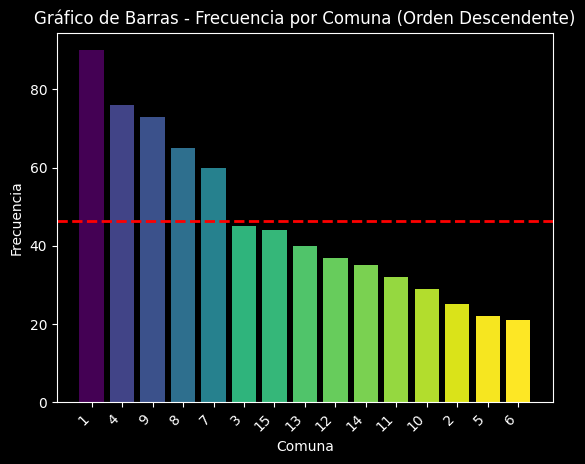

46.266666666666666


In [22]:
# Configuramos el fondo negro y el color del texto blanco, ya que es el tema que escogi por el respeto al tema en investigacion.
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'

# Hago un conteo de frecuencia para cada Comuna
conteo_por_comuna = hechos['COMUNA'].value_counts()

# ordeno en forma descendente por comuna 
conteo_por_comuna = conteo_por_comuna.sort_values(ascending=False)

# Obtén las etiquetas (nombres de las comunas) y sus frecuencias
comunas = conteo_por_comuna.index
frecuencias = conteo_por_comuna.values

# Normaliza las frecuencias para que estén entre 0 y 1
normalizado = (frecuencias - min(frecuencias)) / (max(frecuencias) - min(frecuencias))

# Invierte el esquema de colores para que el mayor valor sea más cálido
colores = plt.cm.viridis_r(normalizado)

# Crear el gráfico de barras con colores personalizados y etiquetas en el eje X
plt.bar(range(len(comunas)), frecuencias, color=colores, tick_label=comunas)

# Añadir línea con la media
mean_line = hechos['COMUNA'].value_counts().mean()
plt.axhline(mean_line, color='red', linestyle='dashed', linewidth=2, label='Media')

# Agregar etiquetas y título
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras - Frecuencia por Comuna (Orden Descendente)')

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()
print(mean_line)

* Podemos observar que las comunas: 1, 4, 9, 8 y 7 se encuentran por encima de la media lo cual nos da indicios para un mejor analisis.

### Visualizamos por tipo de victima

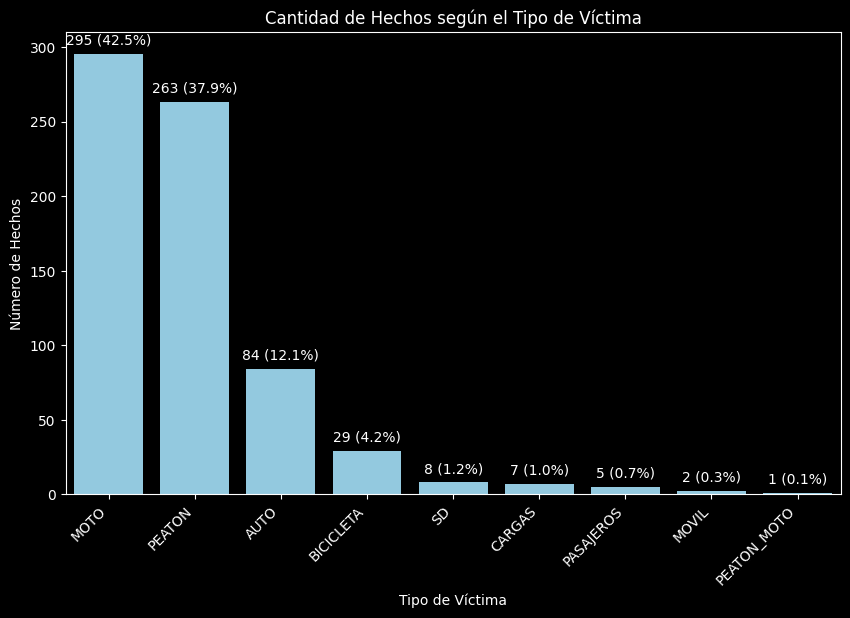

In [26]:
# Configuramos el fondo negro y el color del texto blanco, ya que es el tema que escogiste por el respeto al tema en investigación.
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'

# Obtener datos
conteo_por_victima = hechos['VICTIMA'].value_counts().reset_index(name='Conteo')

# Calcular porcentajes
conteo_por_victima['Porcentaje'] = (conteo_por_victima['Conteo'] / conteo_por_victima['Conteo'].sum()) * 100

# Gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='VICTIMA', y='Conteo', data=conteo_por_victima, color='skyblue')

# Agregar porcentajes dentro de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} ({p.get_height() / conteo_por_victima["Conteo"].sum() * 100:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='white')

# Personalizar el gráfico
plt.xlabel('Tipo de Víctima')
plt.ylabel('Número de Hechos')
plt.title('Cantidad de Hechos según el Tipo de Víctima')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

* Ahora podemos identificar que el tipo de victima con mayor relevancia esta en los motociclistas y los peatones que tienen casi un 80% de los casos, esto nos ayudara a tener un poco mas claridad acerca de la recurrencia de los hechos.